<a href="https://colab.research.google.com/github/ChoeTaeBin/Machine-Learnig/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#데이터 준비

from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()
#유사 정규화
train_scaled = train_input / 255.0
test_scaled = test_input / 255.0

#검증 세트 나누기
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

call back 과 drop out을 사용하지 않은 모델을 만들고 에포크에 따른 손실변화를 살펴보자

In [7]:
#모델 만들기
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape = (28,28))) #flatten층
model.add(keras.layers.Dense(100, activation = 'relu')) #밀집층 relu활성화 함수를 이용
model.add(keras.layers.Dense(10, activation = 'softmax')) #출력층

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
#모델 설정
model.compile(loss='sparse_categorical_crossentropy', metrics = 'accuracy')

#모델 훈련
history = model.fit(train_scaled, train_target, epochs = 20, verbose =0, validation_data = (val_scaled, val_target))

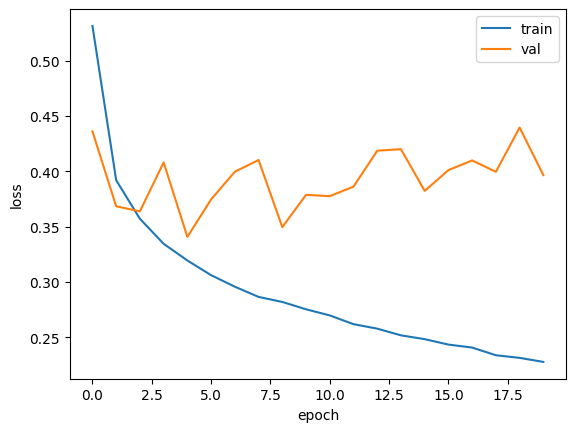

In [11]:
#그래프 그리기
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

5번째 에포크에서 멈추어야 겠다.

drop out을 이용하여 몇개의 뉴런을 임의로 끄고 call back(인공신경망 훈련 옵션)을이용하자
EarlyStopping: 조기종료 , checkpoint_cb: 모델을 저장

In [12]:
#모델 만들기
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape = (28,28))) #flatten층
model.add(keras.layers.Dense(100, activation = 'relu')) #밀집층 relu활성화 함수를 이용
model.add(keras.layers.Dropout(0.3)) #dropdout층 30%를 끔
model.add(keras.layers.Dense(10, activation = 'softmax')) #출력층

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


수행한 에포크 수:  10


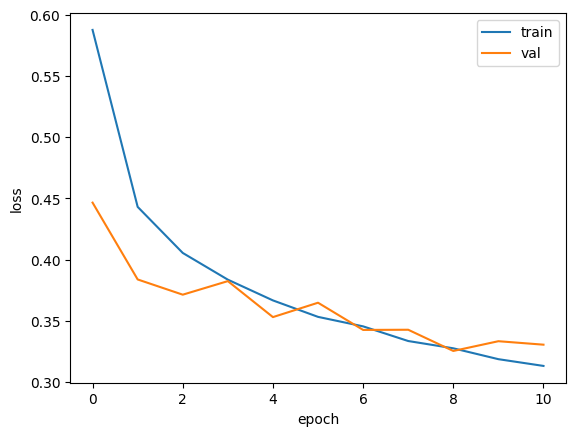

In [18]:
#모델 설정
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics = 'accuracy') #adam알고리즘을 이용

checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only = True)#최고의 모델을 파일에 저장
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True)#최고의 모델로 되돌림

#모델 훈련
history = model.fit(train_scaled, train_target, epochs = 20, verbose =0, validation_data = (val_scaled, val_target),
                    callbacks = [checkpoint_cb, early_stopping_cb])

print('수행한 에포크 수: ',early_stopping_cb.stopped_epoch)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()